# Machine Learning


## Linear Regression

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression

In [6]:
# Setting to display maximum rows and columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
# Loading Dataset
df = sns.load_dataset("taxis")
# Display first few rows
print(df.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [8]:
# Let's check the name of columns
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [9]:
# Let's check for missing values
print(df.isnull().sum())

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [11]:
# Let's check the missing values percentage
print(df.isnull().sum() / len(df) * 100)


pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64


In [12]:
print(df[["payment","pickup_zone","dropoff_zone","pickup_borough","dropoff_borough"]].head())

       payment            pickup_zone           dropoff_zone pickup_borough  \
0  credit card        Lenox Hill West    UN/Turtle Bay South      Manhattan   
1         cash  Upper West Side South  Upper West Side South      Manhattan   
2  credit card          Alphabet City           West Village      Manhattan   
3  credit card              Hudson Sq         Yorkville West      Manhattan   
4  credit card           Midtown East         Yorkville West      Manhattan   

  dropoff_borough  
0       Manhattan  
1       Manhattan  
2       Manhattan  
3       Manhattan  
4       Manhattan  


In [14]:
# Fill missing values using the mode for each column
for column in df.columns:
    if df[column].isnull().any():  # Check if there are missing values
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  # Fill missing values

# Check if there are any missing values left
print(df.isnull().sum())

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


In [15]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to all columns except 'fare'
for column in df.columns:
    if column != 'fare' and df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Display the transformed DataFrame
print(df.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total  color  payment  pickup_zone  dropoff_zone  pickup_borough  \
0    0.0  12.95      1        1           99           176               2   
1    0.0   9.30      1        0          174           182               2   
2    0.0  14.16      1        1            1           190               2   
3    0.0  36.95      1        1           86           202               2   
4    0.0  13.40      1        1          116           202               2   

   dropoff_borough  
0                2  
1             

In [17]:
# Drop all datetime columns from features
X = df.drop(['fare'], axis=1)
datetime_cols = X.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
X = X.drop(datetime_cols, axis=1)

# Now split and train as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.6975140375551041
R-squared: 0.9944981898368453


In [18]:
# Check a sample of actual vs predicted values
sample_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(sample_df.sample(10))  

      Actual  Predicted
1056     5.5   6.087014
5845     4.0   3.515981
5430     9.0   9.242677
315      8.0   8.406649
3469     4.5   5.284127
1375    19.5  19.193506
151     34.0  33.285127
2787     8.5   8.996315
5153     4.5   4.586513
3740    12.0  11.572312


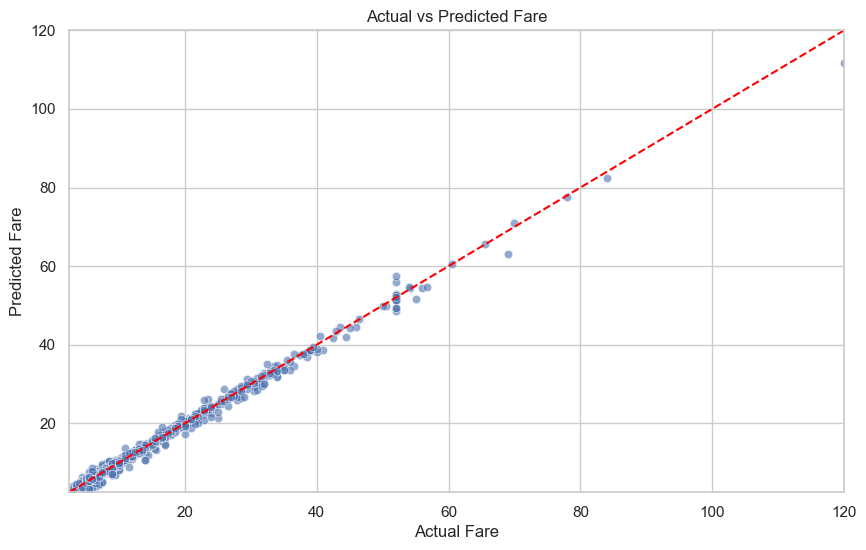

In [19]:
# Assuming you have the actual and predicted values from the previous steps
# Create a DataFrame for visualization
visualization_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=visualization_df, alpha=0.6)
plt.plot([visualization_df['Actual'].min(), visualization_df['Actual'].max()],
         [visualization_df['Actual'].min(), visualization_df['Actual'].max()],
         color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted Fare')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.xlim(visualization_df['Actual'].min(), visualization_df['Actual'].max())
plt.ylim(visualization_df['Actual'].min(), visualization_df['Actual'].max())
plt.show()

In [20]:
# Save the model
import pickle
# Save the model 
model_filename = 'Models/Ride_Fare_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)